In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay

from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

url_mat = "https://raw.githubusercontent.com/sarthak-srivastava/Student-Performance-Dataset/master/student-mat.csv"
url_por = "https://raw.githubusercontent.com/sarthak-srivastava/Student-Performance-Dataset/master/student-por.csv"

mat = pd.read_csv(url_mat, sep=None, engine="python")
por = pd.read_csv(url_por, sep=None, engine="python")

data = pd.concat([mat, por], ignore_index=True)

In [3]:
print(data.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [4]:
data["homework_completed"] = (data["G3"] >= 10).astype(int)
data[["G3", "homework_completed"]].head()

,G3,homework_completed
0,6,0
1,6,0
2,10,1
3,15,1
4,10,1


In [5]:
features = [
    'age',
    'studytime',
    'failures',
    'absences',
    'G1',
    'G2',
    'goout',
    'health'
]

X = data[features]
y = data['homework_completed']

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1044, 8)
y shape: (1044,)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25,
    random_state=42,
    stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 783
Testing samples: 261


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

y_pred_gnb = gnb.predict(X_test_scaled)

print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred_gnb))
print(classification_report(y_test, y_pred_gnb))


GaussianNB Accuracy: 0.8888888888888888
              precision    recall  f1-score   support

           0       0.75      0.74      0.75        58
           1       0.93      0.93      0.93       203

    accuracy                           0.89       261
   macro avg       0.84      0.84      0.84       261
weighted avg       0.89      0.89      0.89       261



In [9]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9003831417624522
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        58
           1       0.94      0.93      0.94       203

    accuracy                           0.90       261
   macro avg       0.85      0.86      0.86       261
weighted avg       0.90      0.90      0.90       261



/Users/chouted/miniconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:22:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [10]:
import pandas as pd

results = pd.DataFrame({
    'Model': ['GaussianNB', 'XGBoost'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_gnb),
        accuracy_score(y_test, y_pred_xgb)
    ]
})

results

,Model,Accuracy
0,GaussianNB,0.888889
1,XGBoost,0.900383


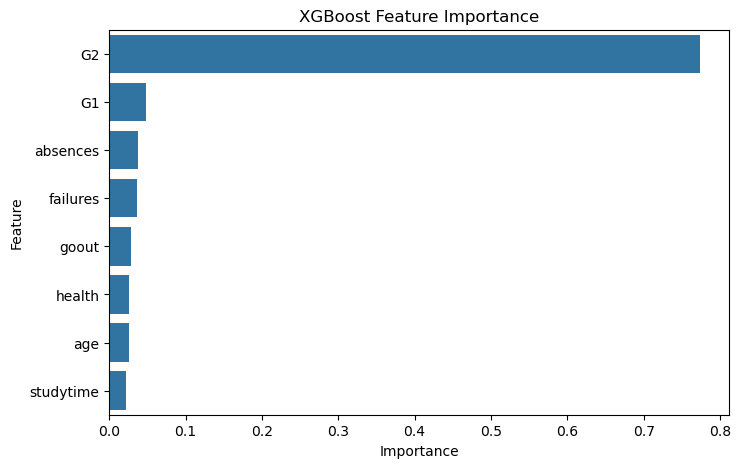

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("XGBoost Feature Importance")
plt.show()